In [ ]:
!pip install autokeras==1.1.0 tensorflow==2.15.1 keras-nlp==0.5.1

In [ ]:
import pandas as pd
import numpy as np
import autokeras as ak
import seaborn as sns

import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('./spam.csv', encoding='ISO-8859-1')

In [ ]:
df.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

In [ ]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [ ]:
drop_columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']

df = df.drop(columns=drop_columns)

In [ ]:
print('Найдено дубликатов: ', df.duplicated().sum())

df.drop_duplicates(subset=['v2'], inplace = True)

print('Осталось дубликатов после очистки: ', df.duplicated().sum())

Найдено дубликатов:  403
Осталось дубликатов после очистки:  0


In [ ]:
df['v1'].value_counts()

,count
v1,
ham,4516
spam,653


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5169 non-null   object
 1   v2      5169 non-null   object
dtypes: object(2)
memory usage: 121.1+ KB


In [ ]:
df.isnull().sum()

,0
v1,0
v2,0


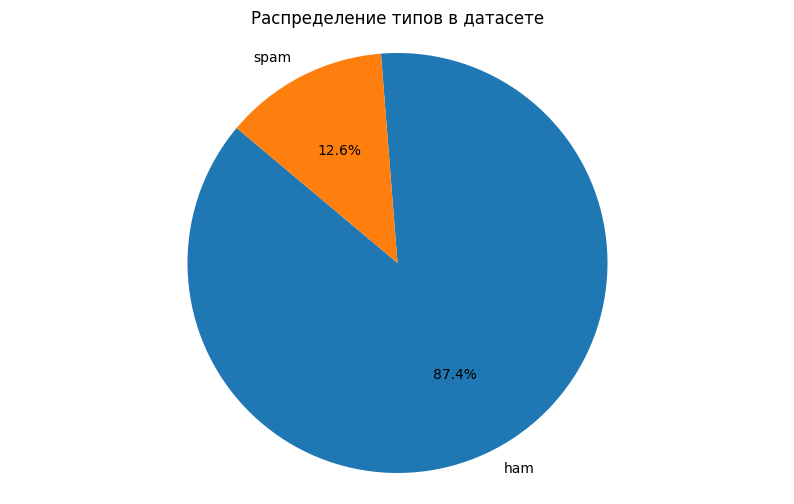

In [ ]:
plt.figure(figsize=(10, 6))
labels = df['v1'].unique()
plt.pie(df['v1'].value_counts(), labels=labels, autopct='%1.1f%%',
        startangle=140)
plt.axis('equal')
plt.title('Распределение типов в датасете')
plt.show()

In [ ]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    lemmatizer = WordNetLemmatizer()
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    return text

df['v2'] = df['v2'].apply(preprocess_text)

In [ ]:
X = np.array(df['v2'])
y = np.array(df['v1'])

In [ ]:
X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, test_size=0.3,
                                                  random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_tmp, y_tmp, test_size=0.5,
                                                random_state=42, stratify=y_tmp)

In [ ]:
clf = ak.TextClassifier(overwrite=True, max_trials=2, objective='val_accuracy',
                        num_classes=2)

result_training = clf.fit(X_train, y_train, epochs=10,
                          validation_data=(X_val, y_val))

Trial 2 Complete [00h 00m 39s]
val_accuracy: 0.9767742156982422

Best val_accuracy So Far: 0.9780645370483398
Total elapsed time: 00h 01m 20s
Epoch 1/10
114/114 [==============================] - 9s 71ms/step - loss: 0.3184 - accuracy: 0.8867 - val_loss: 0.1519 - val_accuracy: 0.9548
Epoch 2/10
114/114 [==============================] - 1s 10ms/step - loss: 0.0761 - accuracy: 0.9779 - val_loss: 0.0806 - val_accuracy: 0.9742
Epoch 3/10
114/114 [==============================] - 1s 9ms/step - loss: 0.0289 - accuracy: 0.9939 - val_loss: 0.0875 - val_accuracy: 0.9742
Epoch 4/10
114/114 [==============================] - 1s 9ms/step - loss: 0.0154 - accuracy: 0.9970 - val_loss: 0.0844 - val_accuracy: 0.9755
Epoch 5/10
114/114 [==============================] - 1s 8ms/step - loss: 0.0094 - accuracy: 0.9986 - val_loss: 0.0958 - val_accuracy: 0.9729
Epoch 6/10
114/114 [==============================] - 1s 9ms/step - loss: 0.0055 - accuracy: 0.9989 - val_loss: 0.1077 - val_accuracy: 0.9742
Epoc

In [ ]:
clf.export_model().summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None,)]                 0         
                                                                 
 expand_last_dim (ExpandLas  (None, 1)                 0         
 tDim)                                                           
                                                                 
 text_vectorization (TextVe  (None, 512)               0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, 512, 64)           320064    
                                                                 
 dropout (Dropout)           (None, 512, 64)           0         
                                                                 
 conv1d (Conv1D)             (None, 508, 256)          82176 

In [ ]:
predicted_y = clf.predict(X_test)
print(clf.evaluate(X_test, y_test))

25/25 [==============================] - 0s 4ms/step - loss: 0.1015 - accuracy: 0.9845
[0.10150019824504852, 0.9845361113548279]


In [ ]:
print(classification_report(y_test, predicted_y))

              precision    recall  f1-score   support

         ham       0.99      1.00      0.99       678
        spam       0.98      0.90      0.94        98

    accuracy                           0.98       776
   macro avg       0.98      0.95      0.96       776
weighted avg       0.98      0.98      0.98       776



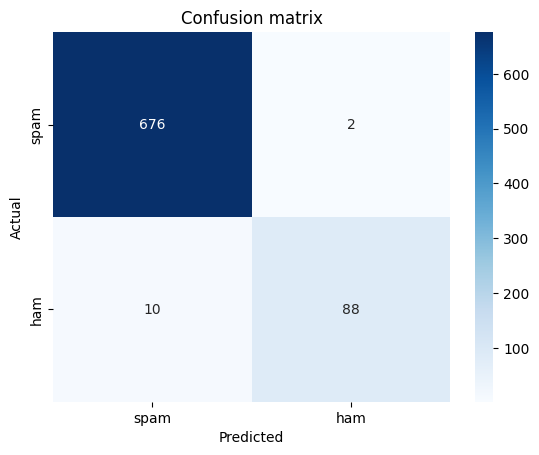

In [ ]:
conf_matrix = confusion_matrix(y_test, predicted_y)
axis_labels = ['spam', 'ham']
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=axis_labels, yticklabels=axis_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix')
plt.show()

In [ ]:
best_model = clf.export_model()
best_model.save('spam_classifier.keras')